In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
left = 0.0
right = 4.0
samples = np.array([0.0])

In [3]:
def loss(x):
    return 2.0 * (x - 2.0)**2

def loss_gradient(x):
    return 4.0 * (x - 2.0)

In [4]:
# hack to change default name "Run interact"
widgets.interact_manual.opts['manual_name'] = 'Execute single step'

interactive(children=(Text(value='0.01', description='learning_rate'), Button(description='Execute single step…

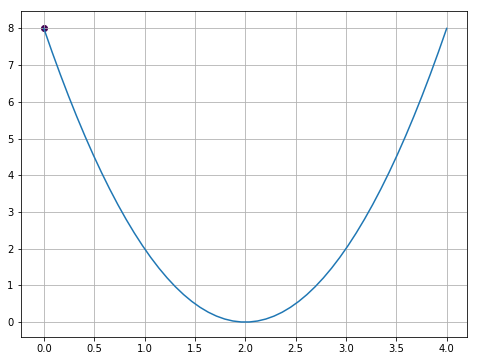

In [5]:
@widgets.interact_manual(learning_rate='0.01')
def plot(learning_rate='0.01'):
    global samples
    global left
    global right
    x = np.linspace(left, right)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.grid(True)
    ax.plot(x, loss(x))
    colors = np.full(samples.shape, 0.5)
    ax.scatter(samples, loss(samples), c=colors)
    last_sample = samples[-1]
    new_sample = last_sample - float(learning_rate) * loss_gradient(last_sample)
    samples = np.append(samples, new_sample)
    left = min(left, new_sample)
    right = max(right, new_sample)
    
plot()